In [1]:
%matplotlib inline
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import plotutils

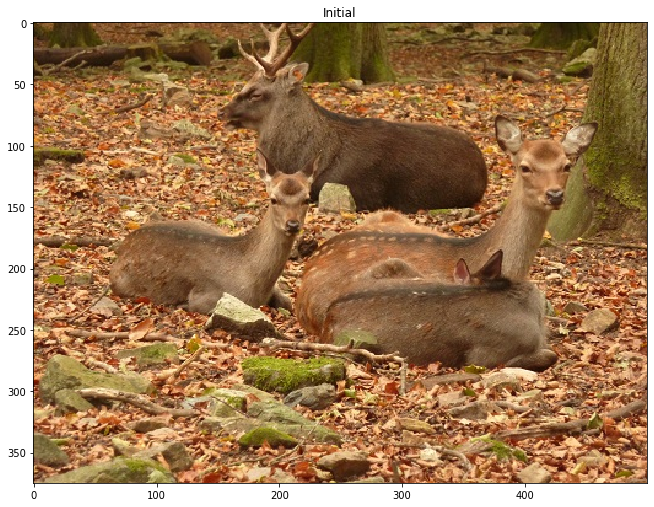

In [2]:
init_img = cv.imread('Data/Deers.jpg')
shape = init_img.shape[1::-1]
plotutils.show('Initial', init_img, 11, shape)

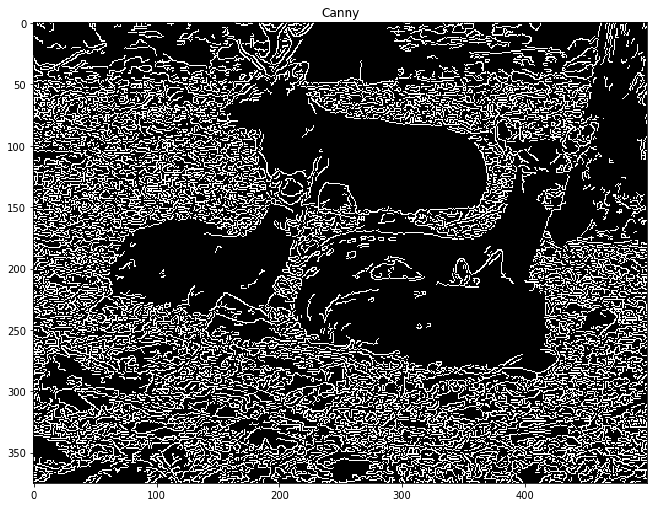

In [3]:
canny = cv.Canny(init_img, 140, 255)
plotutils.show('Canny', canny, 11, shape)

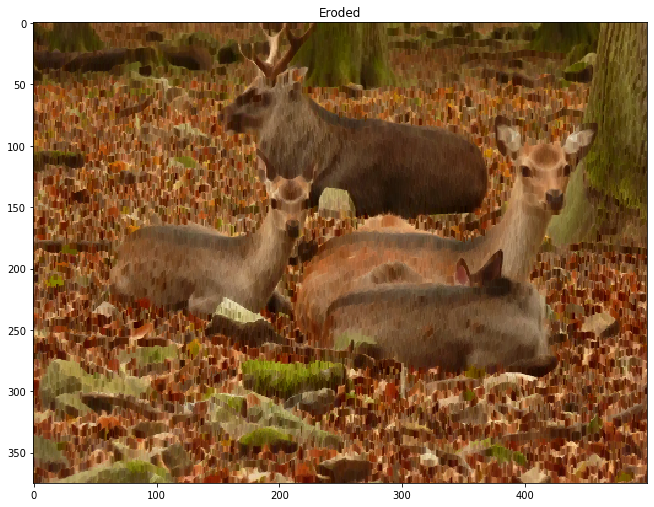

In [4]:
eroded = cv.erode(init_img, (5, 5), iterations=4)
plotutils.show('Eroded', eroded, 11, shape)

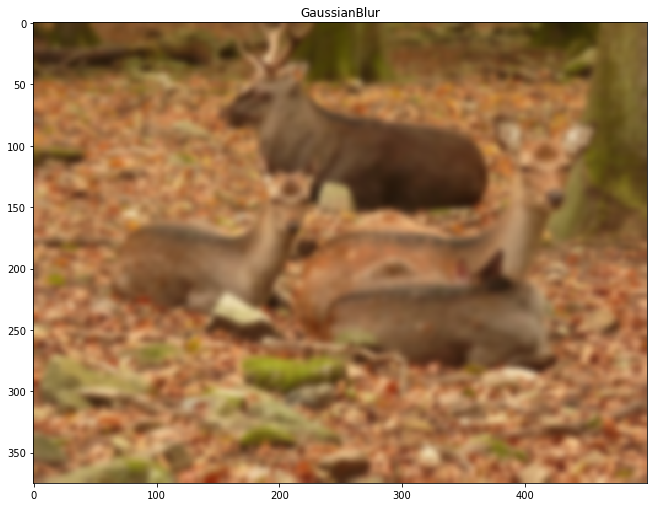

In [5]:
g_blur = cv.GaussianBlur(init_img, (15, 15), 0)
plotutils.show('GaussianBlur', g_blur, 11, shape)

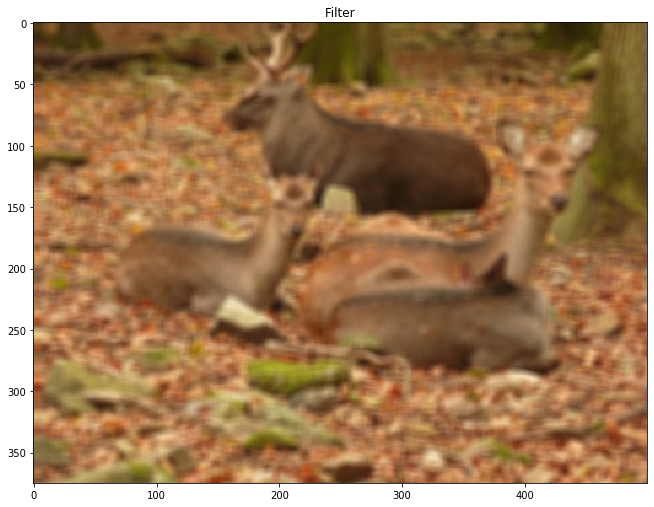

In [6]:
filtered = cv.boxFilter(init_img, 0, (7,7), init_img.copy(), (6,6), True, cv.BORDER_DEFAULT)
plotutils.show('Filter', filtered, 11, shape)

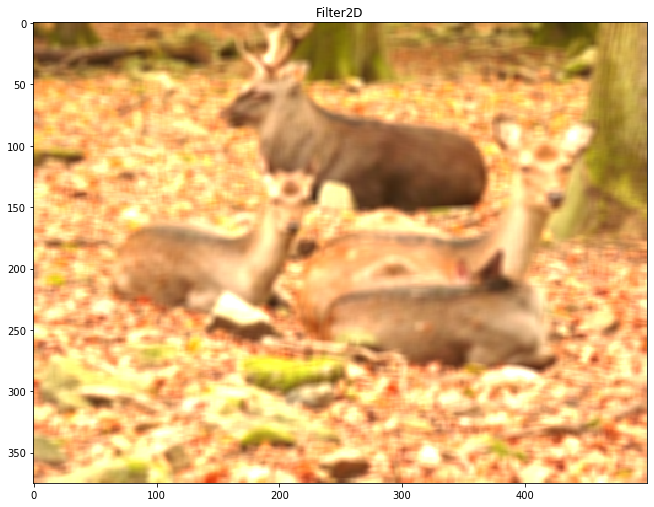

In [7]:
kernel = np.ones((7, 7), np.float32)/30
filtered2d = cv.filter2D(init_img, -1, kernel)
plotutils.show('Filter2D', filtered2d, 11, shape)

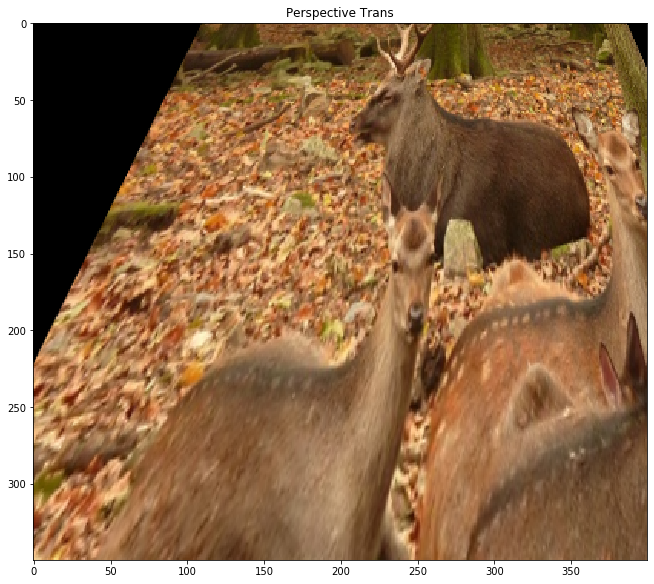

In [8]:
## Coordinates of quadrangle vertices in the source image
arr1 = np.float32([[0, 0], [500, 50], [58, 187], [400, 300]])
## Coordinates of the corresponding quadrangle vertices in the destination image.
arr2 = np.float32([[110, 0], [400, 30], [50, 300], [500, 500]])

retval = cv.getPerspectiveTransform(arr1, arr2)
result = cv.warpPerspective(init_img, retval, (400, 350))

plotutils.show('Perspective Trans', result, 11, shape)

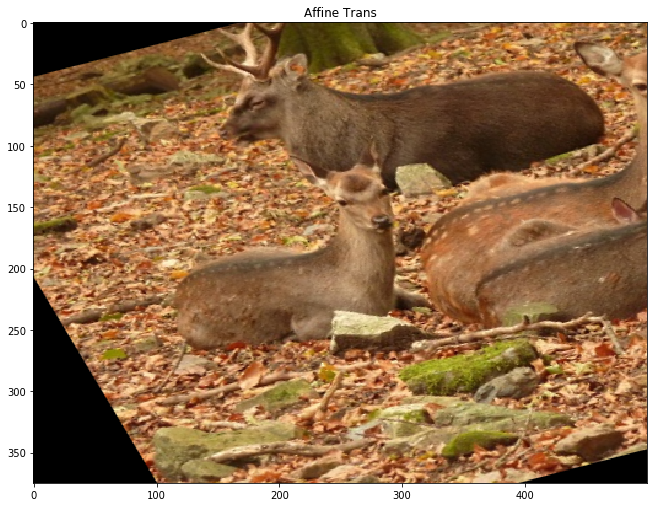

In [9]:
rows, cols = init_img.shape[:-1]

arr1 = np.float32([[50,50], [200,50], [50,200]])
arr2 = np.float32([[10,100], [200,50], [100,250]])
retval = cv.getAffineTransform(arr1, arr2)
result = cv.warpAffine(init_img, retval, (cols,rows))

plotutils.show('Affine Trans', result, 11, shape)

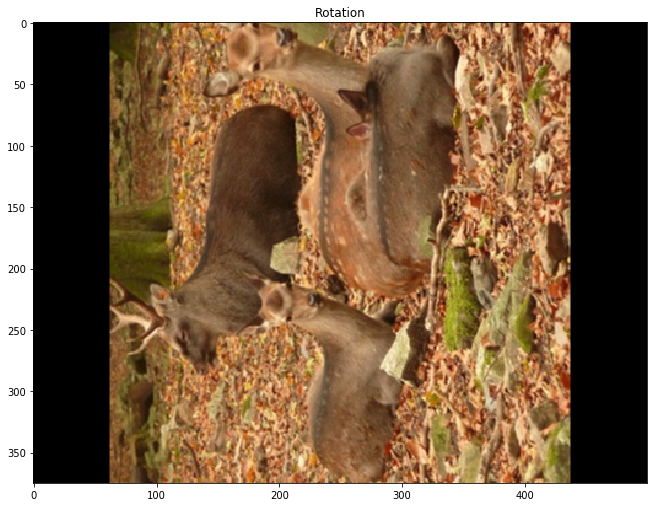

In [10]:
retval = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)
result = cv.warpAffine(init_img, retval, (cols, rows))

plotutils.show('Rotation', result, 11, shape)

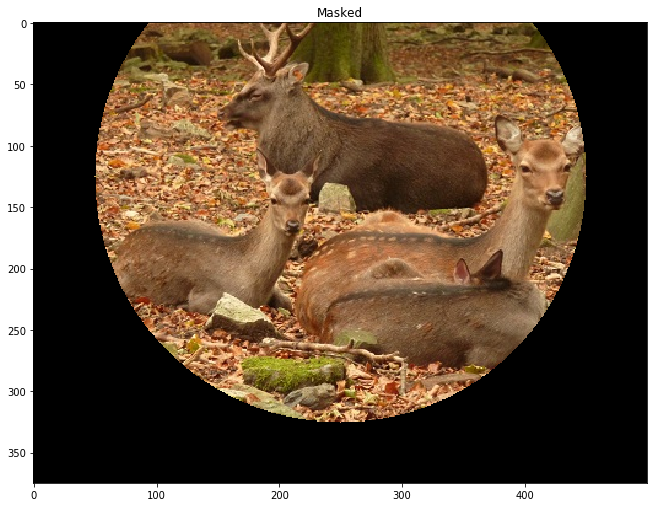

In [11]:
blank_img = np.zeros(init_img.shape[:-1], dtype='uint8')
mask = cv.circle(blank_img, (init_img.shape[1]//2, init_img.shape[0]//3), 200, 200, -1)
masked = cv.bitwise_and(init_img, init_img, mask=mask)
plotutils.show('Masked', masked, 11, shape)